<a href="https://colab.research.google.com/github/stefan-lazarevski/vnp-24-25/blob/master/Lab1_extra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [2]:
!pip install selenium
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.7/481.7 kB 15.3 MB/s eta 0:00:00


# Configuration

In [3]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Simple Usage

In [4]:
# Initialize the webdriver.
browser = webdriver.Chrome(options=options)

In [5]:
# Navigate to a web page.
browser.get('https://finance.yahoo.com/crypto')

In [6]:
# Print the page source code.
print(browser.page_source)

<html lang="en-US" theme="light" data-color-scheme="light" class="desktop neo-green dock-upscale"><head><script type="text/javascript" async="" src="https://static.criteo.net/js/ld/publishertag.prebid.144.js"></script><script charset="UTF-8" type="text/javascript" async="async" src="https://cdn.taboola.com/libtrc/google-topics-api.20241031-27-RELEASE.es6.js"></script><script charset="UTF-8" type="text/javascript" src="https://cdn.taboola.com/libtrc/impl.20241031-27-RELEASE.js"></script><script type="text/javascript" src="//gum.criteo.com/sync?c=72&amp;r=2&amp;j=TRC.getRTUS&amp;us_privacy=1YNN&amp;gdpr=0&amp;gdpr_consent=&amp;gdpr_pd="></script><script type="text/javascript" async="" src="//pm-widget.taboola.com/yahooweb-network/load.js"></script>
        <meta charset="utf-8">
        <meta name="oath:guce:consent-host" content="guce.yahoo.com">
        <link rel="preconnect" href="//s.yimg.com" crossorigin="anonymous"><link rel="preconnect" href="//geo.yahoo.com"><link rel="preconnect

# Laboratory Exercise - Run Mode (8 points)

In this laboratory assignment, the goal is to perform web scraping using **Selenium** on the website https://finance.yahoo.com/crypto. The task includes the extraction of **Cryptocurrency names** and their **price** and **market cap**. Following this data extraction, you will construct a data frame to organize the collected data. Finally, you are expected to generate a histogram to provide a visual representation of the distribution of the prices.

## Hints
- To navigate to a specific page with a given URL, use the `browser.get(url)` method.
- When selecting a single element, use `browser.find_element`, and for multiple elements, use `browser.find_elements`. Both of these functions take two arguments. The first specifies the attribute used to locate the element on the web page, and the second specifies the value of that attribute.
- The `By` class is used to specify which attribute is used to locate elements on a page. These are the various ways the attributes are used to locate elements on a page: `By.ID`, `By.NAME`, `By.TAG_NAME`, `BY.CLASS_NAME`, `By.CSS_SELECTOR`, etc.
- For more details, check the documentation (https://selenium-python.readthedocs.io/locating-elements.html).

## Solution

In [41]:
url='https://finance.yahoo.com/markets/crypto/all/'
browser.get(url)
crypto=[]
lines=browser.find_elements(By.TAG_NAME,'tr')[1:]
for row in lines:
    cells=row.find_elements(By.CLASS_NAME,'cell')
    name=cells[0].text
    price=float(cells[3].text.replace(',',''))
    cap=cells[6].text
    Dict={
        'Names':name,
        'Prices':price,
        'Market-Cap':cap}
    crypto.append(Dict)

In [37]:
df=pd.DataFrame(crypto)
df

,Names,Prices,Market-Cap
0,BTC-USD,70133.430000,1.387T
1,ETH-USD,2519.800000,303.407B
2,USDT-USD,0.999172,120.473B
3,BNB-USD,578.760000,83.399B
4,SOL-USD,168.200000,79.174B
5,USDC-USD,1.000100,34.735B
6,XRP-USD,0.517730,29.443B
7,STETH-USD,2516.430000,24.554B
8,DOGE-USD,0.162420,23.812B
9,WTRX-USD,0.167597,14.652B


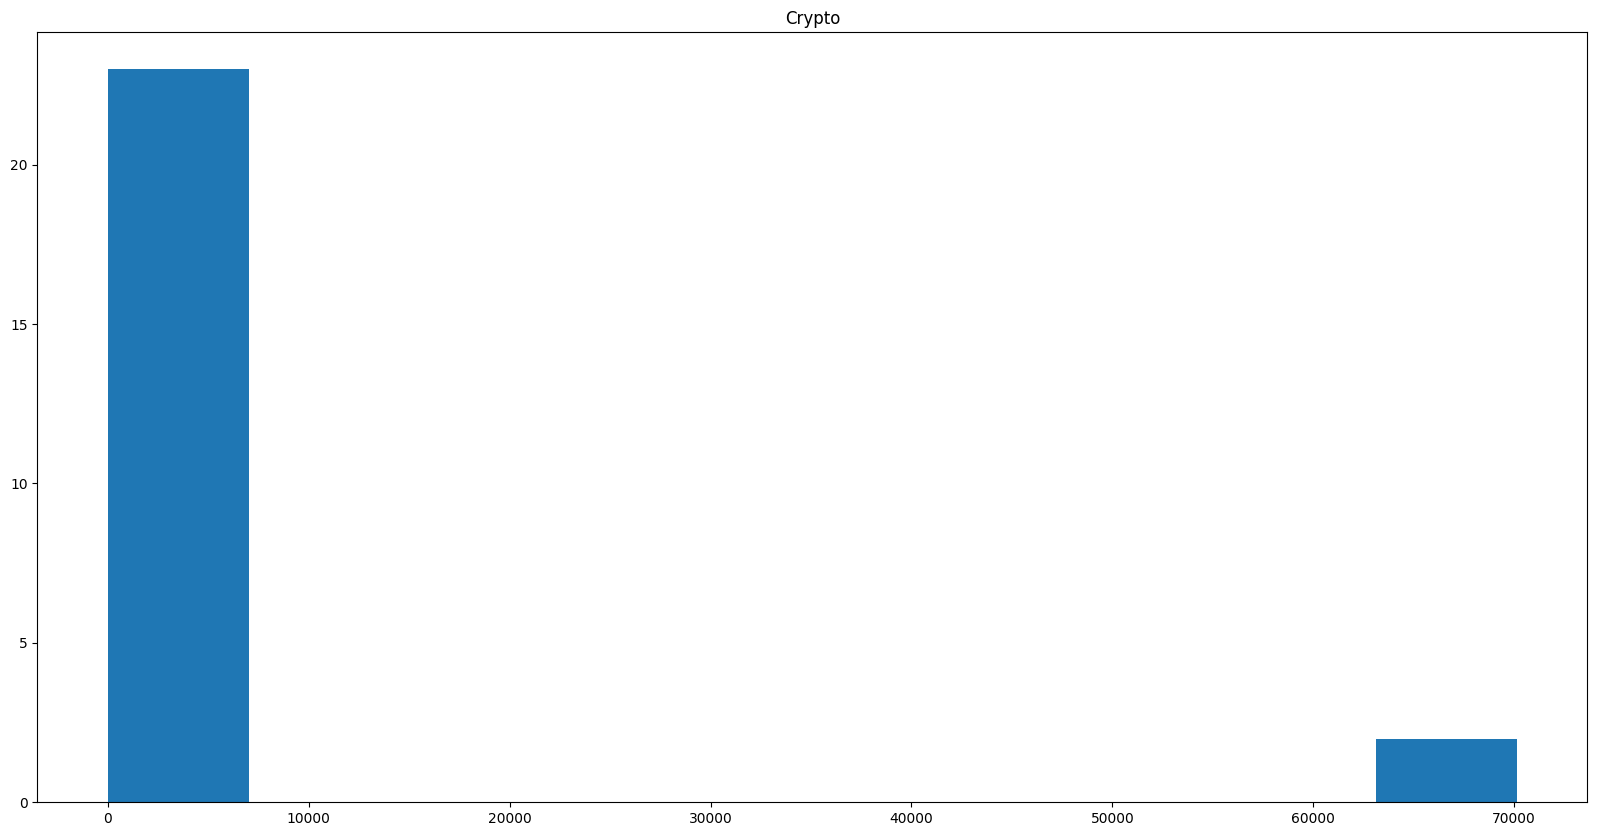

In [48]:
plt.figure(figsize=(20, 10))
plt.hist(df['Prices'])
plt.title('Crypto')
plt.show()

# Laboratory Exercise - Bonus Task (+ 2 points)

The additional task involves clicking on the symbol for BTC-USD and on the new page that appears click on the **Historical data**. You will extract the prices and market caps for the BTC-USD only, and make line plot for the price data.

## Hints
- To populate an input field (`input_field`) with some `text` use `input_field.send_keys(text)`.
- To click on a specific `element` on a web page use `element.click()`.

## Solution

In [ ]:
# Write your code here.

In [ ]:
# Add as many code boxes as you need.